# Heart attack data - EDA and prediction 

Age : Age of the patient

Sex : Sex of the patient

exang: exercise induced angina (1 = yes; 0 = no)

ca: number of major vessels (0-3)

cp : Chest Pain type chest pain type

Value 1: typical angina
Value 2: atypical angina
Value 3: non-anginal pain
Value 4: asymptomatic
trtbps : resting blood pressure (in mm Hg)

chol : cholestoral in mg/dl fetched via BMI sensor

fbs : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

rest_ecg : resting electrocardiographic results

Value 0: normal
Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
thalach : maximum heart rate achieved

target : 0= less chance of heart attack 1= more chance of heart attack

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import ParameterGrid
from tensorflow import zeros
from tensorflow.data import Dataset
from tensorflow.keras import Sequential, backend
from tensorflow.keras.layers import Dense, Dropout, LeakyReLU
from tensorflow.keras.metrics import AUC
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam, RMSprop, SGD


### Reading the data

In [2]:
heartdata = pd.read_csv(r'/kaggle/input/heart-attack-analysis-prediction-dataset/heart.csv')
o2saturation = pd.read_csv(r'/kaggle/input/heart-attack-analysis-prediction-dataset/o2Saturation.csv')

# Exploratory Data Analysis

In [3]:
o2saturation.head(20)

,98.6
0,98.6
1,98.6
2,98.6
3,98.1
4,97.5
5,97.5
6,97.5
7,97.5
8,97.5
9,97.5


In [4]:
heartdata.head(20)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [5]:
heartdata.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [6]:
heartdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [7]:
heartdata.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

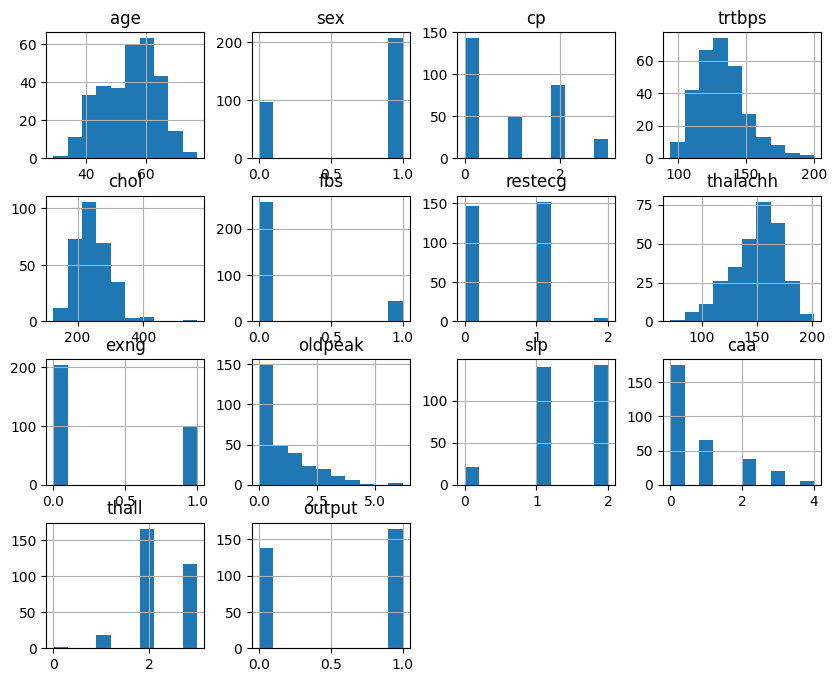

In [8]:
heartdata.hist(figsize=(10,8))
plt.show()

In [9]:
heartdata['key'] = range(len(heartdata))
o2saturation['key'] = range(len(o2saturation))

In [10]:
heartdata = heartdata.merge(o2saturation,on="key")

In [11]:
heartdata.shape

(303, 16)

In [12]:
heartdata.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output,key,98.6
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,0,98.6
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,1,98.6
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,2,98.6
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,3,98.1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,4,97.5


In [13]:
dict = {}
for i in list(heartdata.columns):
    dict[i] = heartdata[i].value_counts().shape[0]

pd.DataFrame(dict,index=["unique count"]).transpose()

,unique count
age,41
sex,2
cp,4
trtbps,49
chol,152
fbs,2
restecg,3
thalachh,91
exng,2
oldpeak,40


In [14]:
cat_cols = ['sex','exng','caa','cp','fbs','restecg','slp','thall']
con_cols = ["age","trtbps","chol","thalachh","oldpeak"]
target_col = ["output"]
print("The categorial cols are : ", cat_cols)
print("The continuous cols are : ", con_cols)
print("The target variable is :  ", target_col)

The categorial cols are :  ['sex', 'exng', 'caa', 'cp', 'fbs', 'restecg', 'slp', 'thall']
The continuous cols are :  ['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']
The target variable is :   ['output']


In [15]:
averageagebyheartattack = heartdata.groupby('output')['age'].mean()
print("Average age by Heart Attack",averageagebyheartattack)
     

Average age by Heart Attack output
0    56.601449
1    52.496970
Name: age, dtype: float64


In [16]:
# cross tabuation between gender and heart attack
gender_heartattack_cross = pd.crosstab(heartdata['sex'],heartdata['output'],normalize ="index")*100
print("\nCross tabulation between gender and heart attack \n",gender_heartattack_cross)


Cross tabulation between gender and heart attack 
 output          0          1
sex                         
0       25.000000  75.000000
1       55.072464  44.927536


In [17]:
df_corr = heartdata[con_cols].corr().transpose()
df_corr

,age,trtbps,chol,thalachh,oldpeak
age,1.000000,0.279351,0.213678,-0.398522,0.210013
trtbps,0.279351,1.000000,0.123174,-0.046698,0.193216
chol,0.213678,0.123174,1.000000,-0.009940,0.053952
thalachh,-0.398522,-0.046698,-0.009940,1.000000,-0.344187
oldpeak,0.210013,0.193216,0.053952,-0.344187,1.000000


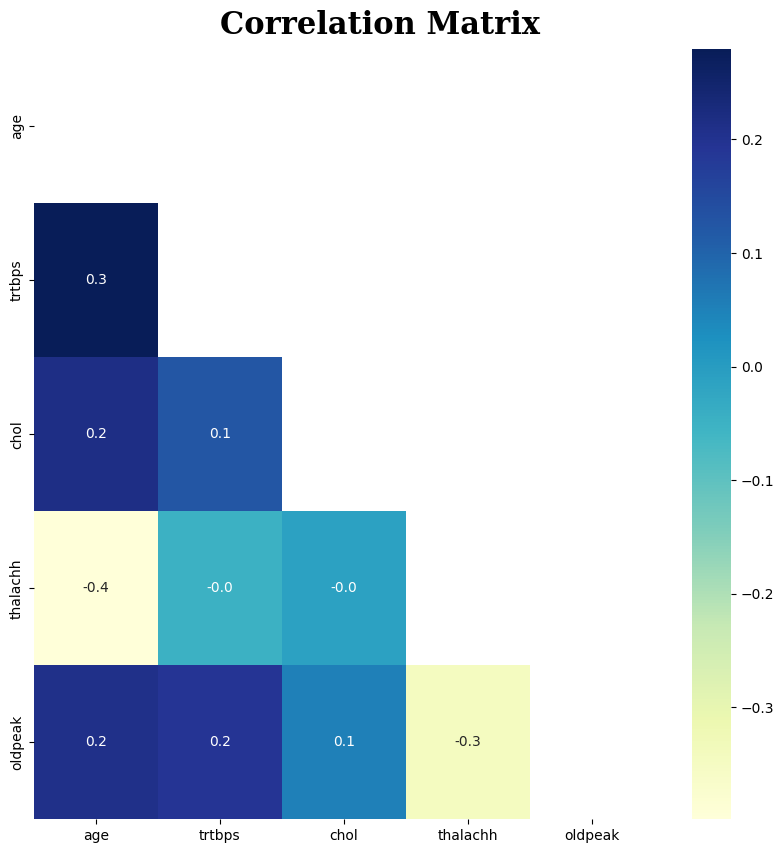

In [18]:
fig = plt.figure(figsize=(10,10))
gs = fig.add_gridspec(1,1)
gs.update(wspace=0.3, hspace=0.15)
ax0 = fig.add_subplot(gs[0,0])

color_palette = ["#5833ff","#da8829"]
mask = np.triu(np.ones_like(df_corr))
ax0.text(1.5,-0.1,"Correlation Matrix",fontsize=22, fontweight='bold', fontfamily='serif', color="#000000")
df_corr = heartdata[con_cols].corr().transpose()
sns.heatmap(df_corr,mask=mask,fmt=".1f",annot=True,cmap='YlGnBu')
plt.show()

# Preparing data for training

In [19]:
X= heartdata.drop('output',axis =1)
y = heartdata['output']

In [20]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.1,random_state =42,stratify = y)

In [21]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((272, 15), (31, 15), (272,), (31,))

In [22]:
y_train.head()

80     1
295    0
255    0
6      1
125    1
Name: output, dtype: int64

### Scaling the data

In [23]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert the scaled arrays back to pandas DataFrames with the original column names
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X.columns)


### Parameter Tuning

In [24]:
# Different parameters on which we can tune the model
param_grid = {
    'learning_rate': [0.001, 0.01],
    'optimizer':['Adam', 'RMSprop' , 'sgd'],
    'dropout': [0.2, 0.1]
}
    
param_combinations = list(ParameterGrid(param_grid))

# Print all combinations
for params in param_combinations:
    print("\n\n\n")
    print(params)
    backend.clear_session()
    model = Sequential()
    model.add(Dense(units = 32, input_dim = 15, activation = 'relu'))
    model.add(Dropout(params['dropout']))  
    model.add(Dense(units = 16, activation = 'relu'))
    model.add(Dense(units = 1, activation='sigmoid'))
    if params['optimizer'] == 'Adam':
        optimizer = Adam(learning_rate=params['learning_rate'])
    elif params['optimizer'] == 'RMSprop':
            optimizer = RMSprop(learning_rate=params['learning_rate'])
    elif params['optimizer'] == 'sgd':
                optimizer = SGD(learning_rate=params['learning_rate'])
    model.compile(optimizer = optimizer, loss='binary_crossentropy', metrics=[AUC()])
    callback = EarlyStopping(monitor='val_auc', patience=2)
    model.fit(X_train_scaled, y_train, epochs=25, batch_size=50, validation_split=0.1, callbacks=[callback], verbose=2)
    
    train_loss, train_auc = model.evaluate(X_train_scaled, y_train)
    test_loss, test_auc = model.evaluate(X_test_scaled, y_test)
    print(f'Train AUC: {train_auc} Test AUC: {test_auc}')





{'dropout': 0.2, 'learning_rate': 0.001, 'optimizer': 'Adam'}
Epoch 1/25
5/5 - 2s - loss: 0.8360 - auc: 0.4097 - val_loss: 0.7421 - val_auc: 0.5026 - 2s/epoch - 345ms/step
Epoch 2/25
5/5 - 0s - loss: 0.7916 - auc: 0.4752 - val_loss: 0.7080 - val_auc: 0.6051 - 42ms/epoch - 8ms/step
Epoch 3/25
5/5 - 0s - loss: 0.7681 - auc: 0.4990 - val_loss: 0.6771 - val_auc: 0.7154 - 57ms/epoch - 11ms/step
Epoch 4/25
5/5 - 0s - loss: 0.7152 - auc: 0.6155 - val_loss: 0.6499 - val_auc: 0.7795 - 44ms/epoch - 9ms/step
Epoch 5/25
5/5 - 0s - loss: 0.6918 - auc: 0.6428 - val_loss: 0.6258 - val_auc: 0.8615 - 42ms/epoch - 8ms/step
Epoch 6/25
5/5 - 0s - loss: 0.6616 - auc: 0.7027 - val_loss: 0.6028 - val_auc: 0.9051 - 59ms/epoch - 12ms/step
Epoch 7/25
5/5 - 0s - loss: 0.6433 - auc: 0.7339 - val_loss: 0.5812 - val_auc: 0.9333 - 44ms/epoch - 9ms/step
Epoch 8/25
5/5 - 0s - loss: 0.6042 - auc: 0.8111 - val_loss: 0.5612 - val_auc: 0.9385 - 42ms/epoch - 8ms/step
Epoch 9/25
5/5 - 0s - loss: 0.6026 - auc: 0.7949 - v

# Training the model

In [25]:
# Final model training after hyper parameter tuning
backend.clear_session()
model = Sequential()
model.add(Dense(units = 20, input_dim = 15, activation = 'relu'))
model.add(Dropout(0.1))  # Add dropout for regularization
model.add(Dense(units = 10, activation = 'relu'))
model.add(Dense(units = 5, activation = 'relu'))
model.add(Dense(units = 1, activation='sigmoid'))
model.compile(optimizer = SGD(learning_rate=0.01), loss='binary_crossentropy', metrics=[AUC()])
callback = EarlyStopping(monitor='val_auc', patience=5)
history = model.fit(X_train_scaled, y_train, epochs=100, batch_size=25, validation_split=0.1, callbacks=[callback], verbose=2)

Epoch 1/100
10/10 - 1s - loss: 0.6370 - auc: 0.7854 - val_loss: 0.6324 - val_auc: 0.8641 - 1s/epoch - 104ms/step
Epoch 2/100
10/10 - 0s - loss: 0.6284 - auc: 0.8185 - val_loss: 0.6217 - val_auc: 0.8795 - 53ms/epoch - 5ms/step
Epoch 3/100
10/10 - 1s - loss: 0.6196 - auc: 0.8370 - val_loss: 0.6112 - val_auc: 0.8769 - 522ms/epoch - 52ms/step
Epoch 4/100
10/10 - 0s - loss: 0.6095 - auc: 0.8301 - val_loss: 0.5988 - val_auc: 0.9077 - 56ms/epoch - 6ms/step
Epoch 5/100
10/10 - 0s - loss: 0.5935 - auc: 0.8838 - val_loss: 0.5858 - val_auc: 0.9103 - 56ms/epoch - 6ms/step
Epoch 6/100
10/10 - 0s - loss: 0.5896 - auc: 0.8688 - val_loss: 0.5715 - val_auc: 0.9179 - 57ms/epoch - 6ms/step
Epoch 7/100
10/10 - 0s - loss: 0.5800 - auc: 0.8781 - val_loss: 0.5577 - val_auc: 0.9256 - 57ms/epoch - 6ms/step
Epoch 8/100
10/10 - 0s - loss: 0.5751 - auc: 0.8704 - val_loss: 0.5436 - val_auc: 0.9333 - 57ms/epoch - 6ms/step
Epoch 9/100
10/10 - 0s - loss: 0.5595 - auc: 0.8962 - val_loss: 0.5287 - val_auc: 0.9487 - 57m

### Plotting the training and validation loss

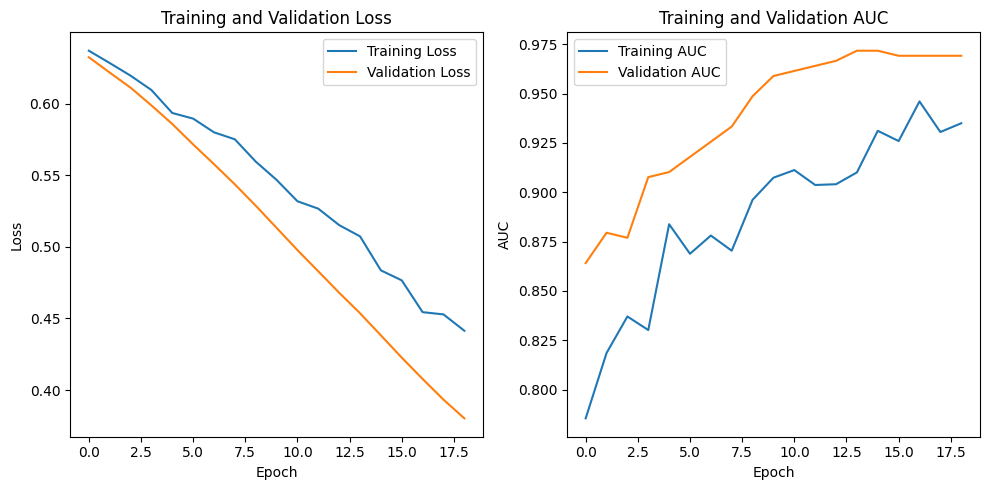

In [26]:

train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_auc = history.history['auc']
val_auc = history.history['val_auc']

# Plot training and validation loss
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(train_auc, label='Training AUC')
plt.plot(val_auc, label='Validation AUC')
plt.title('Training and Validation AUC')
plt.xlabel('Epoch')
plt.ylabel('AUC')
plt.legend()

# Show the plots
plt.tight_layout()
plt.show()

# Accuracy of the model

In [27]:
# Evaluating the model on test dataset
test_loss, test_auc = model.evaluate(X_test_scaled, y_test)
print(f'Test AUC: {test_auc}') 

1/1 [==============================] - 0s 32ms/step - loss: 0.5079 - auc: 0.9160
Test AUC: 0.9159663915634155


In [28]:
preds = model.predict(X_test_scaled)

1/1 [==============================] - 0s 122ms/step


In [29]:
y_test['Heart attack status'] = preds
y_test.head()

239    0
268    0
95     1
188    0
302    0
Name: output, dtype: object

In [30]:
y_test.columns = ['index', 'output']

In [31]:
y_test.head()

239    0
268    0
95     1
188    0
302    0
Name: output, dtype: object